In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv('train_data_new.csv')
test = pd.read_csv('test_data_new.csv')

In [4]:
train.shape

(974653, 14)

In [5]:
test.shape

(51298, 14)

In [6]:
train.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000396386,1659,GTAACCT,0.00398,2.87,90.9,0.00487,4.31,99.5,0.00689,1.78,78.0,ENSG00000122565,0
1,ENST00000311922,1672,AGGACAG,0.01160,8.19,109.0,0.00498,6.09,105.0,0.00772,2.51,75.6,ENSG00000173334,1
2,ENST00000367287,874,CGGACTT,0.01090,6.63,123.0,0.01790,10.30,122.0,0.00631,1.69,84.6,ENSG00000134375,1
3,ENST00000464595,303,TGGACTG,0.00432,2.93,116.0,0.01550,9.42,120.0,0.01260,2.65,86.3,ENSG00000114391,0
4,ENST00000479992,728,GAAACAG,0.01260,4.07,102.0,0.00896,5.12,93.5,0.00631,2.84,87.9,ENSG00000142541,1


In [15]:
# Encode the sequence data
from sklearn.preprocessing import LabelEncoder
le_sequence = LabelEncoder()
train_encoded = train.copy()
train_encoded['sequence_encoded'] = le_sequence.fit_transform(train_encoded['sequence'])
train_encoded = train_encoded.drop(columns=['sequence'])
train_encoded.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,sequence_encoded
0,ENST00000396386,1659,0.00398,2.87,90.9,0.00487,4.31,99.5,0.00689,1.78,78.0,ENSG00000122565,0,199
1,ENST00000311922,1672,0.01160,8.19,109.0,0.00498,6.09,105.0,0.00772,2.51,75.6,ENSG00000173334,1,38
2,ENST00000367287,874,0.01090,6.63,123.0,0.01790,10.30,122.0,0.00631,1.69,84.6,ENSG00000134375,1,119
3,ENST00000464595,303,0.00432,2.93,116.0,0.01550,9.42,120.0,0.01260,2.65,86.3,ENSG00000114391,0,262
4,ENST00000479992,728,0.01260,4.07,102.0,0.00896,5.12,93.5,0.00631,2.84,87.9,ENSG00000142541,1,146


In [24]:
# do it for test set 
le_sequence = LabelEncoder()
test_encoded = test.copy()
test_encoded['sequence_encoded'] = le_sequence.fit_transform(test_encoded['sequence'])
test_encoded = test_encoded.drop(columns=['sequence'])
test_encoded.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,sequence_encoded
0,ENST00000293308,652,0.01030,7.48,121.0,0.01000,4.79,129.0,0.00381,1.99,91.3,ENSG00000170421,1,165
1,ENST00000262584,659,0.00830,5.13,121.0,0.01630,7.00,132.0,0.00266,2.80,84.2,ENSG00000161016,0,160
2,ENST00000254322,1170,0.00498,3.83,114.0,0.01460,3.98,114.0,0.00465,1.67,79.4,ENSG00000132002,1,256
3,ENST00000301821,802,0.00291,3.47,110.0,0.00651,6.96,128.0,0.00963,3.34,88.9,ENSG00000168028,1,262
4,ENST00000339276,1165,0.00797,8.21,132.0,0.00946,1.75,97.5,0.01660,2.55,94.2,ENSG00000175793,1,34


In [17]:
train_encoded['transcript_position'].nunique()

6807

In [18]:
train_encoded['sequence_encoded'].nunique()

288

In [19]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
numerical_data = train_encoded.drop(["transcript_id", "gene_id", "label"], axis=1).columns
train_encoded[numerical_data] = scaler.fit_transform(train_encoded[numerical_data])

In [25]:
# do it for test set 
scaler = preprocessing.MinMaxScaler()
numerical_data2 = test_encoded.drop(["transcript_id", "gene_id", "label"], axis=1).columns
test_encoded[numerical_data2] = scaler.fit_transform(test_encoded[numerical_data2])

In [20]:
train_encoded.head()

,transcript_id,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label,sequence_encoded
0,ENST00000396386,0.088665,0.026747,0.014256,0.228378,0.032313,0.033144,0.258530,0.055379,0.013956,0.197531,ENSG00000122565,0,0.693380
1,ENST00000311922,0.089361,0.114595,0.043050,0.472973,0.033421,0.047523,0.330709,0.064168,0.020487,0.160494,ENSG00000173334,1,0.132404
2,ENST00000367287,0.046635,0.106525,0.034606,0.662162,0.163479,0.081531,0.553806,0.049238,0.013151,0.299383,ENSG00000134375,1,0.414634
3,ENST00000464595,0.016063,0.030666,0.014581,0.567568,0.139320,0.074423,0.527559,0.115841,0.021739,0.325617,ENSG00000114391,0,0.912892
4,ENST00000479992,0.038818,0.126124,0.020751,0.378378,0.073485,0.039687,0.179790,0.049238,0.023439,0.350309,ENSG00000142541,1,0.508711


In [21]:
train_encoded.describe()

,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,label,sequence_encoded
count,974653.000000,974653.000000,974653.000000,974653.000000,974653.000000,974653.000000,974653.000000,974653.000000,974653.000000,974653.000000,974653.000000,974653.000000
mean,0.071238,0.075495,0.022989,0.532786,0.066017,0.040166,0.437080,0.058540,0.024952,0.332149,0.486907,0.486488
std,0.058825,0.062997,0.013870,0.147234,0.053973,0.023485,0.162079,0.047198,0.015148,0.085255,0.499829,0.308951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032607,0.030666,0.012741,0.445946,0.028891,0.022400,0.278215,0.026578,0.015298,0.270062,0.000000,0.160279
50%,0.056861,0.057989,0.018911,0.567568,0.051741,0.033548,0.475066,0.045743,0.020845,0.341049,0.000000,0.512195
75%,0.095090,0.099608,0.030276,0.635135,0.086974,0.053258,0.566929,0.076662,0.029701,0.395062,1.000000,0.749129
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
X_train = train_encoded.drop(["transcript_id", "gene_id"], axis=1)
y_train = train_encoded['label']
X_test = test_encoded.drop(["transcript_id", "gene_id"], axis=1)
y_test = test_encoded['label']

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
27413/27413 [==============================] - 146s 5ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 9.7062e-25 - val_accuracy: 1.0000
Epoch 2/50
27413/27413 [==============================] - 216s 8ms/step - loss: 8.4746e-10 - accuracy: 1.0000 - val_loss: 1.8824e-28 - val_accuracy: 1.0000
Epoch 3/50
27413/27413 [==============================] - 237s 9ms/step - loss: 8.9806e-11 - accuracy: 1.0000 - val_loss: 5.5220e-29 - val_accuracy: 1.0000
Epoch 4/50
27413/27413 [==============================] - 102s 4ms/step - loss: 1.5772e-10 - accuracy: 1.0000 - val_loss: 2.1014e-32 - val_accuracy: 1.0000
Epoch 5/50
27413/27413 [==============================] - 129s 5ms/step - loss: 1.5154e-11 - accuracy: 1.0000 - val_loss: 2.3454e-32 - val_accuracy: 1.0000
Epoch 6/50
27413/27413 [==============================] - 115s 4ms/step - loss: 7.3170e-11 - accuracy: 1.0000 - val_loss: 3.5098e-33 - val_accuracy: 1.0000
Epoch 7/50
27413/27413 [==============================] - 195s 7ms/s

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


1604/1604 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 100.00%


In [30]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

print(classification_report(y_test, y_pred_classes))


1604/1604 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26289
           1       1.00      1.00      1.00     25009

    accuracy                           1.00     51298
   macro avg       1.00      1.00      1.00     51298
weighted avg       1.00      1.00      1.00     51298



1604/1604 [==============================] - 2s 1ms/step


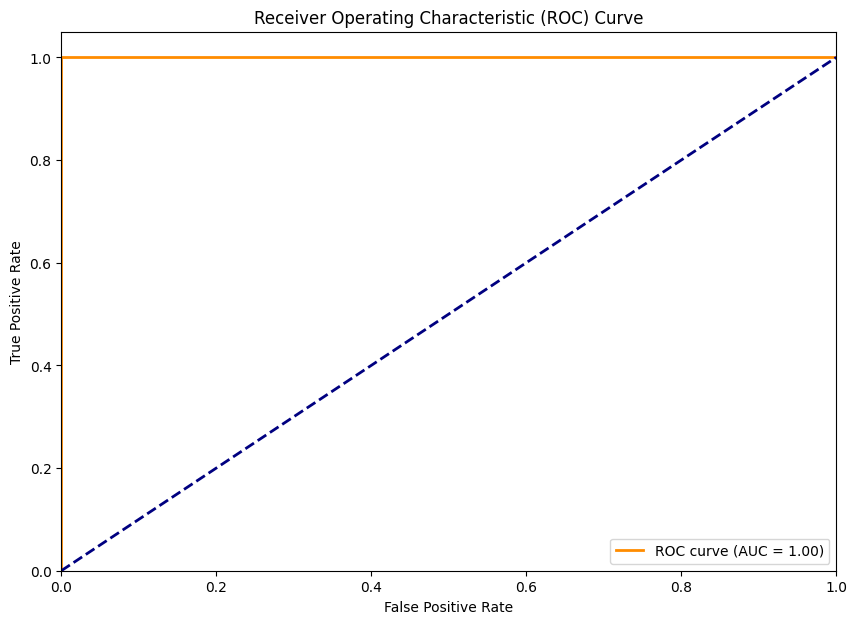

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_probs = model.predict(X_test).ravel()  # Get predicted probabilities

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
